<a href="https://colab.research.google.com/github/LxMera/Deep-Learning---denoising-rs-fMRI/blob/master/Prediction_weights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os.path as path
if path.exists('Data'):   
    print ('The folder already exists')
else:
    !wget -nc https://www.dropbox.com/s/ufwmggstfj0xr8c/DatosXYZ.mat?dl=1
    !wget -nc https://www.dropbox.com/s/9vfa4ehuhu76jjl/Data.zip?dl=1
    !unzip Data.zip?dl=1 | awk 'BEGIN { ORS = "" } { print "|" }'
    !rm -r Data.zip?dl=1
    !mv DatosXYZ.mat?dl=1 Data/DatosXYZ.mat

The folder already exists


In [0]:
import numpy as np
import scipy.io

In [4]:
mat = scipy.io.loadmat('Data/DatosXYZ.mat')
etique = scipy.io.loadmat('Data/LabelFix.mat')
Datos=mat['Datos_C']
Etiq=np.transpose(etique['series'])[:,0]

print (np.shape(Datos))
print (np.shape(Etiq))

(22877, 27)
(22877,)


In [0]:
import os
import gzip
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
from IPython.display import clear_output

### Training and test data

In [6]:
por=int(np.shape(Datos)[0]*0.8)

X_test=Datos[por:]
X_train=Datos[:por]

y_test=Etiq[por:]
y_train=Etiq[:por]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(18301, 27)
(18301,)
(4576, 27)
(4576,)


[ 2.65838835e-02  2.99830351e-02  4.89544541e-02  9.62231981e-02
  6.06203941e-02  1.63180287e-01  9.82370280e-02  7.02150318e-02
  6.09911219e-01  3.17912445e+00 -1.57420587e-12  1.03733211e-01
 -3.94837318e+03  1.02355786e+01  2.61504669e+00  6.43204848e+00
  5.82836200e-01  1.08794071e-01  1.11607143e-02  1.43240533e+03
  6.26133380e-02  2.79017857e-03  1.55837208e+02  4.78451111e+01
  1.77325856e+01  0.00000000e+00  2.15657860e-02]


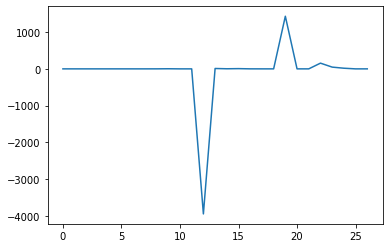

In [7]:
ind = np.random.permutation(X_train.shape[0])
plt.plot(X_train[ind[0],:]);
print(X_train[ind[0]])

In [8]:
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler

input_dim = X_train.shape[1]

scaler = StandardScaler()
X_trainNx = scaler.fit_transform(X_train)
X_testNx = scaler.fit_transform(X_test)
DatosN=scaler.fit_transform(Datos)

y_trainOHE = np_utils.to_categorical(y_train)
nb_classes = y_trainOHE.shape[1]

print(y_trainOHE[ind[0],:])

Using TensorFlow backend.


[1. 0.]


[-0.96880687 -1.41290211 -0.7912846   0.1654339  -0.41254277 -0.76936215
 -0.17649693  0.45151468  0.63582862 -0.13801258 -0.06966091  1.32061015
 -1.2460555  -0.05889241 -0.7503516  -0.34198319 -0.61459778 -1.01787729
 -1.34689455 -0.39363505 -0.39362386 -0.51582363 -1.01787729 -1.06017472
 -1.12657294  0.         -0.81111794]


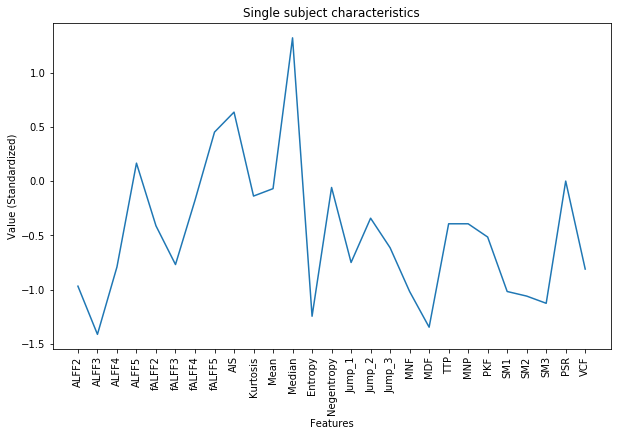

In [9]:
plt.figure(figsize=(10,6))
plt.plot(X_trainNx[ind[0],:]);
plt.title('Single subject characteristics')
plt.xlabel('Features')
pos=np.arange(27)
lab=['ALFF2','ALFF3','ALFF4','ALFF5','fALFF2','fALFF3','fALFF4','fALFF5','AIS','Kurtosis','Mean','Median','Entropy','Negentropy','Jump_1','Jump_2','Jump_3','MNF','MDF','TTP','MNP','PKF','SM1','SM2','SM3','PSR','VCF']
plt.xticks(pos,lab, rotation='vertical')
plt.ylabel('Value (Standardized)')
print(X_trainNx[ind[0]])

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout
from sklearn.decomposition import FastICA, PCA

In [11]:
bat=500
reg=0.4
epo=100
pre1=[]
pre2=[]
pre3=[]
pre4=[]
  
for co in range(0,27,1):
  #print("Componentes ", co)  
  #pca = PCA(n_components=co)
  #X_trainN = pca.fit_transform(X_trainNx)
  #X_testN = pca.fit_transform(X_testNx)
  
  X=np.transpose((X_trainNx[:,co], X_trainNx[:,co], X_trainNx[:,co], X_trainNx[:,co]))
  X=np.concatenate((X,X), axis=1)
  
  X2=np.transpose((X_testNx[:,co], X_testNx[:,co], X_testNx[:,co], X_testNx[:,co]))
  X2=np.concatenate((X2,X2), axis=1)
  
  X_trainN = X
  X_testN = X2
  
  input_dim = X_testN.shape[1]
  print (input_dim)
  print (nb_classes)
  
  #First model
  model = Sequential()
  model.add(Dense(13, input_dim=input_dim))
  model.add(Activation('tanh'))
  model.add(Dropout(reg))
  model.add(Dense(6))
  model.add(Activation('tanh'))
  model.add(Dropout(reg))
  model.add(Dense(nb_classes, activation='softmax'))
  
  #Second model
  model2 = Sequential()
  model2.add(Dense(8, input_dim=input_dim))
  model2.add(Activation('tanh'))
  model2.add(Dropout(reg))
  model2.add(Dense(4))
  model2.add(Activation('tanh'))
  model2.add(Dropout(reg))
  model2.add(Dense(nb_classes, activation='softmax'))
  
  #Third model
  model3 = Sequential()
  model3.add(Dense(16, input_dim=input_dim))
  model3.add(Activation('tanh'))
  model3.add(Dropout(reg))
  model3.add(Dense(8))
  model3.add(Activation('tanh'))
  model3.add(Dropout(reg))
  model3.add(Dense(4))
  model3.add(Activation('tanh'))
  model3.add(Dropout(reg))
  model3.add(Dense(nb_classes, activation='softmax'))

  #Fourth model
  model4 = Sequential()
  model4.add(Dense(8, input_dim=input_dim))
  model4.add(Activation('tanh'))
  model4.add(Dropout(reg))
  model4.add(Dense(nb_classes, activation='softmax'))

  #model parameters
  model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
  model2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
  model3.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
  model4.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
  
  print("Training model 1...")
  history1x=model.fit(X_trainN, y_trainOHE, epochs=epo, batch_size=bat, validation_split=0.1, verbose=0)
  
  print("Training model 2...")
  history2x=model2.fit(X_trainN, y_trainOHE, epochs=epo, batch_size=bat, validation_split=0.1, verbose=0)
  
  print("Training model 3...")
  history3x=model3.fit(X_trainN, y_trainOHE, epochs=epo, batch_size=bat, validation_split=0.1, verbose=0)
  
  print("Training model 4...")
  history4x=model4.fit(X_trainN, y_trainOHE, epochs=epo, batch_size=bat, validation_split=0.1, verbose=0)
  
  
  #clear_output(wait=True)  
  preds = model.predict_classes(X_testN, verbose=0)
  Accuracy = np.mean(preds == y_test)
  pre1.append(Accuracy)  
  print('Accuracy = ', Accuracy*100, '%')
    
  preds2 = model2.predict_classes(X_testN, verbose=0)
  Accuracy2 = np.mean(preds2 == y_test)
  pre2.append(Accuracy2)
  print('Accuracy = ', Accuracy2*100, '%')  
  
  preds3 = model3.predict_classes(X_testN, verbose=0)
  Accuracy3 = np.mean(preds3 == y_test)
  pre3.append(Accuracy3)
  print('Accuracy = ', Accuracy3*100, '%')
  
  preds4 = model4.predict_classes(X_testN, verbose=0)
  Accuracy4 = np.mean(preds4 == y_test)
  pre4.append(Accuracy4)
  print('Accuracy = ', Accuracy4*100, '%')
  
  del model
  del model2
  del model3
  del model4
  #del pca

8
2




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Training model 1...
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








Training model 2...
Training model 3...
Training model 4...
Accuracy =  89.48863636363636 %
Accuracy =  89.57604895104895 %
Accuracy =  89.57604895104895 %
Accuracy =  89.35751748251748 %
8
2
Training model 1...
Training model 2...
Training model 3...
Training model 4...
Accuracy =  89.57604895104895 %
Accuracy =  89.57604895104895 %
Accuracy =  89.57604895104895 %
Accuracy =  89.57604895104895 %
8
2
Training model 1...
Training model 2...
Training model 3...
Training model 4...
Accuracy =  95.1048951048951 %
Accuracy =  95.1923076923077 %
Accuracy =  94.5367132867133 %
Accuracy =  95.01748251748252 %
8
2
Training model 1...
Training model 2...
Training model 3...
Training model 4...
Accuracy =  92.0236013986014 %
Accuracy =  92.11101398601399

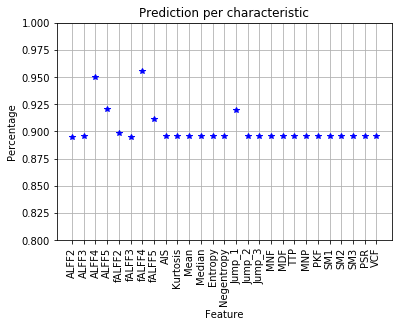

In [12]:
pos=np.arange(27)
plt.plot(np.mean(np.transpose((pre1,pre2,pre3,pre4)), axis=1), '*b')
plt.title('Prediction per characteristic')
plt.xlabel('Feature')
plt.ylabel('Percentage')
plt.ylim([0.8, 1])
plt.xticks(pos,lab, rotation='vertical')
plt.grid()
